## Exercício 1) 

*Dada a rede bipartida do slide 22 (Fig. 4.14a), crie uma função que a receba como entrada e gere as redes de co-ocorrência possíveis, a partir de duas projeções. Espera-se uma projeção como a do item b da mesma Figura (pessoas são nós) e também a projeção em que os nós são os sites. As redes resultantes possuem pesos.*

Dica: Existem funções prontas tanto no igraph quanto na networkx que fazem esse tipo de projeção.


In [3]:
import networkx as nx

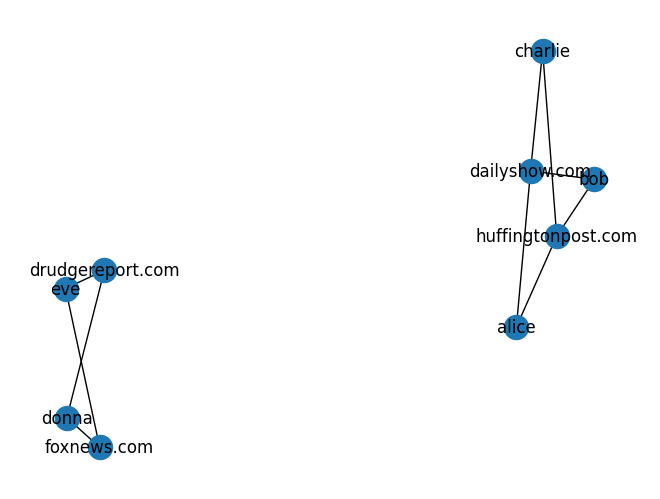

In [7]:
R = nx.Graph()
# Add nodes with the node attribute "bipartite"
R.add_nodes_from(["alice", "bob", "charlie", "donna", "eve"], bipartite=0)
R.add_nodes_from(["dailyshow.com", "huffingtonpost.com", "foxnews.com", "drudgereport.com"], bipartite=1)
# Add edges only between nodes of opposite node sets
R.add_edges_from([("alice", "dailyshow.com"), ("alice", "huffingtonpost.com"), ("bob", "dailyshow.com"), ("bob", "huffingtonpost.com"), ("donna", "foxnews.com"), ("donna", "drudgereport.com"), ("eve","foxnews.com"), ("eve","drudgereport.com"), ("charlie","dailyshow.com"), ("charlie","huffingtonpost.com")])

nx.draw(R, with_labels=True)

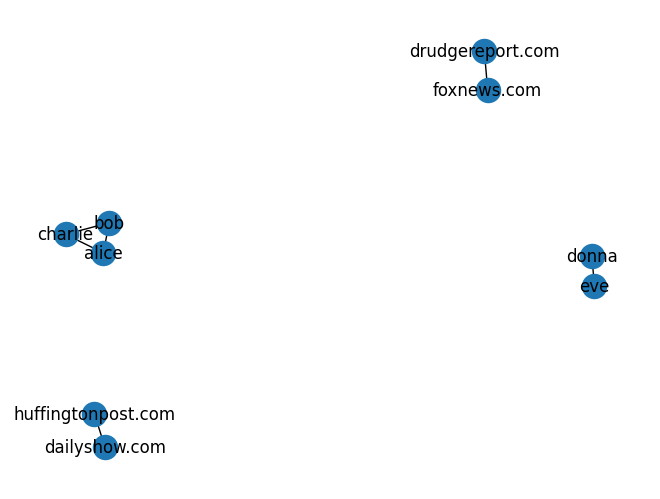

In [13]:
def redes_recorrencias(G, pessoas_nodes, sites_nodes): 
    return nx.bipartite.weighted_projected_graph(G, pessoas_nodes), nx.bipartite.weighted_projected_graph(G, sites_nodes)

pessoas, sites = redes_recorrencias(R,["alice", "bob", "charlie", "donna", "eve"], ["dailyshow.com", "huffingtonpost.com", "foxnews.com", "drudgereport.com"])
nx.draw(pessoas, with_labels=True)
nx.draw(sites, with_labels=True)


## Exercício 2)

*Compute e exiba as seguintes métricas para cada rede gerada no exercício anterior: o strengh de cada nó, o grau de cada nó, o betweenness de cada nó, o parâmetro de heterogeneidade da rede.*

Dica: no igraph, se você não indicar qual o parâmetro que contém os pesos, a biblioteca vai considerar que as arestas possuem peso 1. Nesse caso, se os pesos estiverem no atributo "weights" das arestas, o cálculo do strength se dá da seguinte forma: strength = g.strength(weights='weight'). É provável que na networkx seja parecido. Basta conferir na documentação (dá um Google).

In [19]:
def sgb_rede(G):
    # Graus
    graus = G.degree()
    print('Graus (nó, grau):')
    for g in graus:
        print(g)

    # Strengh
    graus = G.degree()
    print('Graus (nó, grau):')
    for g in graus:
        print(g)
    
    # Betweenness
    


# Métricas para rede de pessoas
print('Heterogeneidade da rede pessoas:')
print('Strengh, grau e betweennes de cada nó da rede de pessoas:')
sgb_rede(pessoas)


# Métricas para rede de sites
print('Heterogeneidade da rede pessoas:')
print('Strengh, grau e betweennes de cada nó da rede de pessoas:')


Heterogeneidade da rede pessoas:
Strengh, grau e betweennes de cada nó da rede de pessoas:
Graus (nó, grau):
('alice', 2)
('bob', 2)
('charlie', 2)
('donna', 1)
('eve', 1)
Graus (nó, grau):
('alice', 2)
('bob', 2)
('charlie', 2)
('donna', 1)
('eve', 1)
Heterogeneidade da rede pessoas:
Strengh, grau e betweennes de cada nó da rede de pessoas:
